In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [94]:
startup=pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [95]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [96]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [97]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Figure size 1200x800 with 0 Axes>

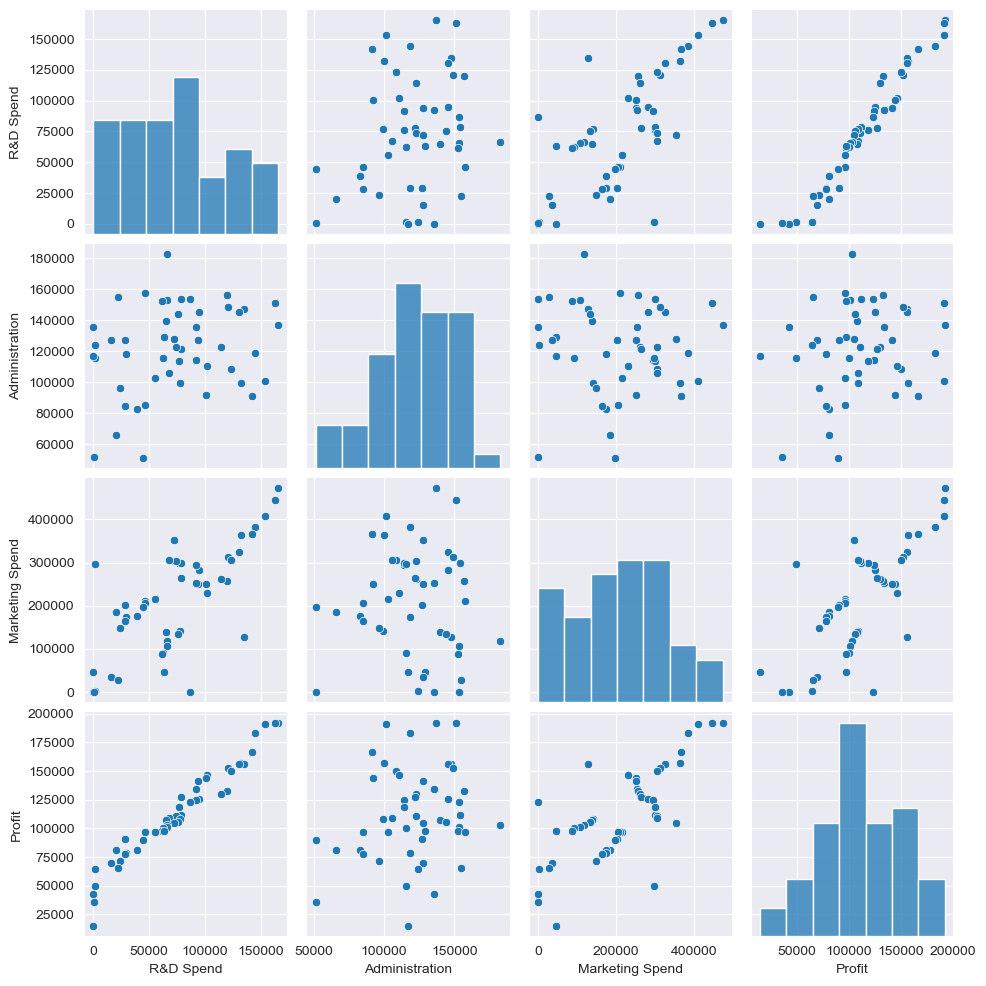

In [116]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)
plt.show()

# Preparing a model

In [99]:
startup_all=startup.rename(columns={'R&D Spend':'Rds','Marketing Spend':'Marketspend'})
startup_all.head()

,Rds,Administration,Marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [115]:
model=smf.ols('Rds~Administration+Marketspend+State+Profit',data=startup_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rds   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.89e-27
Time:                        10:48:55   Log-Likelihood:                -532.76
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      44   BIC:                             1089.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.918e+04   7795.911     -7.592      0.000   -7.49e+04   -4.35e+04
State[T.Florida]   -515.6837   3906.415     -0.132      0.896   -8388.545    7357.178
State[T.New York]   664.0412   3772.464      0.176      0.861   -6938.860    8266.942
Administration        0.0847      0.059      1.426      0.161      -0.035       0.204
Marketspend           0.0061      0.020      0.300      0.766      -0.035       0.047
Profit                1.0827      0.062     17.369      0.000       0.957       1.208
==============================================================================
Omnibus:                        6.289   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.640
Skew:                           0.557   Prob(JB):                       0.0596
Kurtosis:                       4.210   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
model.params

Intercept           -59182.880694
State[T.Florida]      -515.683709
State[T.New York]      664.041165
Administration           0.084654
Marketspend              0.006120
Profit                   1.082736
dtype: float64

In [102]:
print(model.tvalues,'\n',model.pvalues)

Intercept            -7.591529
State[T.Florida]     -0.132009
State[T.New York]     0.176023
Administration        1.426004
Marketspend           0.299998
Profit               17.368580
dtype: float64 
 Intercept            1.567981e-09
State[T.Florida]     8.955786e-01
State[T.New York]    8.610834e-01
Administration       1.609241e-01
Marketspend          7.655916e-01
Profit               2.578772e-21
dtype: float64


In [103]:
startup_all.describe()

,Rds,Administration,Marketspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [104]:
sns.pairplot(startup_all)

In [105]:
model_admk=smf.ols('Administration~Marketspend',data=startup_all).fit()
model_admk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04968
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.825
Time:                        10:48:05   Log-Likelihood:                -582.45
No. Observations:                  50   AIC:                             1169.
Df Residuals:                      48   BIC:                             1173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.229e+05   8041.026     15.284      0.000    1.07e+05    1.39e+05
Marketspend    -0.0074      0.033     -0.223      0.825      -0.074       0.059
==============================================================================
Omnibus:                        2.883   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.185
Skew:                          -0.507   Prob(JB):                        0.335
Kurtosis:                       3.147   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model_mads=smf.ols('Marketspend~Rds',data=startup_all).fit()
model_mads.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Marketspend   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     52.95
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.77e-09
Time:                        10:48:05   Log-Likelihood:                -637.56
No. Observations:                  50   AIC:                             1279.
Df Residuals:                      48   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.878e+04    2.3e+04      2.995      0.004    2.26e+04    1.15e+05
Rds            1.9295      0.265      7.277      0.000       1.396       2.463
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.221
Skew:                          -0.342   Prob(JB):                        0.329
Kurtosis:                       3.774   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model_admk=smf.ols('Profit~Rds+Administration',data=startup_all).fit()
model_admk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           7.29e-31
Time:                        10:48:05   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Rds                0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 1.Collinearity check

In [108]:
rsq_r=smf.ols("Rds~Administration+Marketspend",data=startup_all).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~Rds+Marketspend",data=startup_all).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_p=smf.ols("Marketspend~Rds+Administration",data=startup_all).fit().rsquared
vif_p=1/(1-rsq_p)

d1={'Variables':['Rds','Administration','Marketspend'],'Vif':[vif_a,vif_r,vif_p]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Rds,1.175091
1,Administration,2.468903
2,Marketspend,2.326773


#  Residual Analysis
TEST FOR NORMALITY OF RESIDUALS(Q-Q PLOT)

In [109]:
#qq plot using residual model
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

<Figure size 1200x800 with 0 Axes>

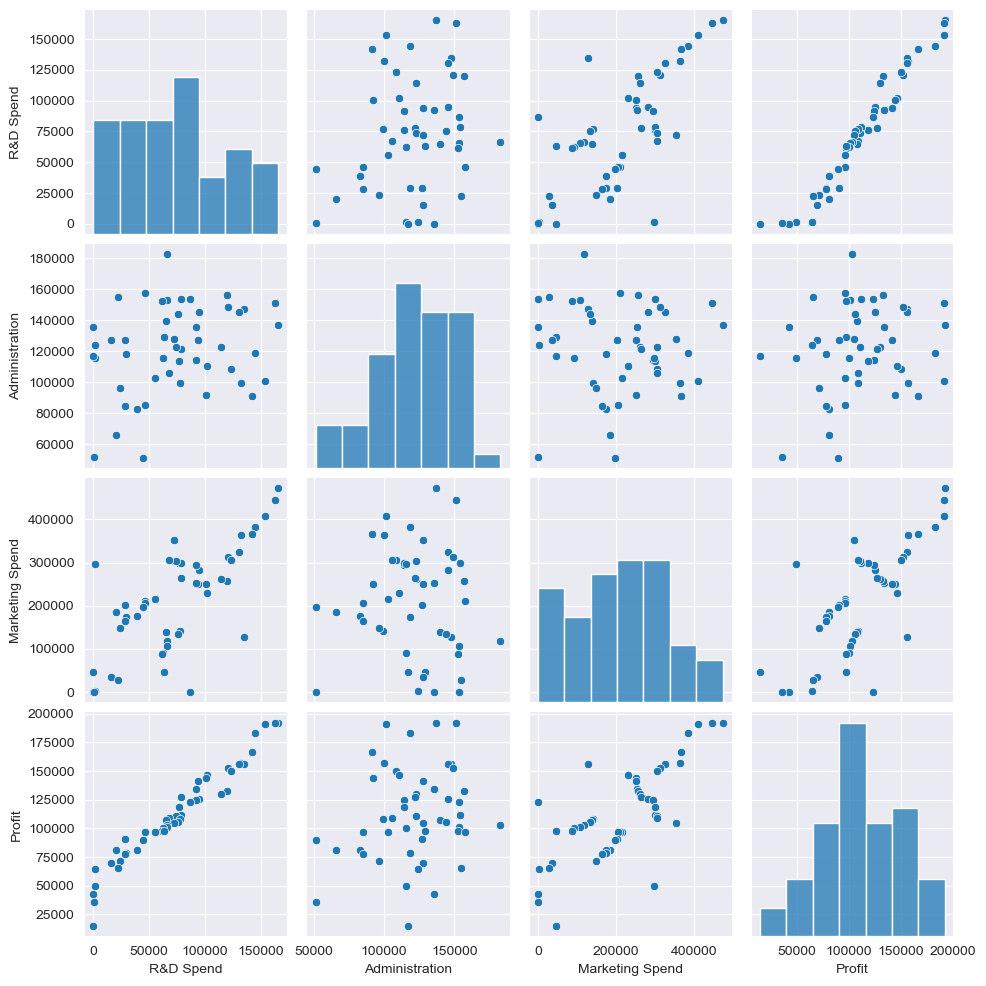

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

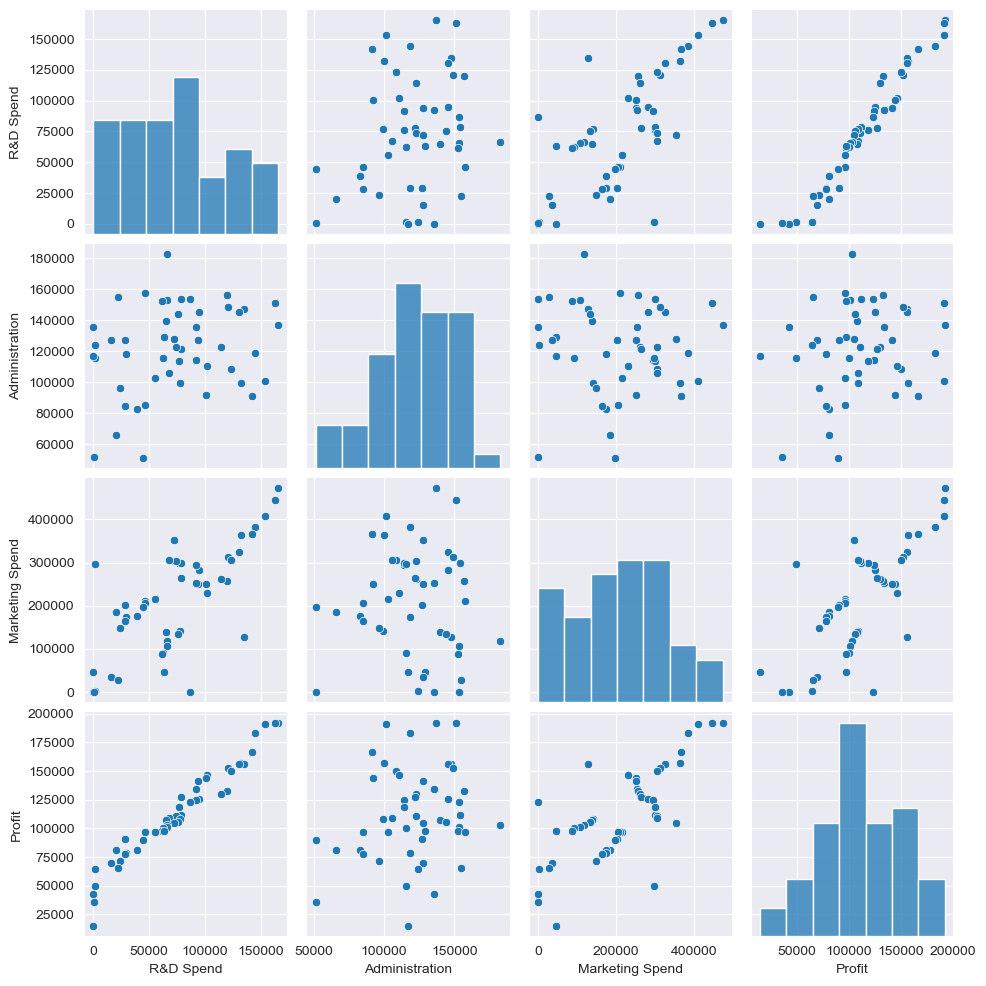

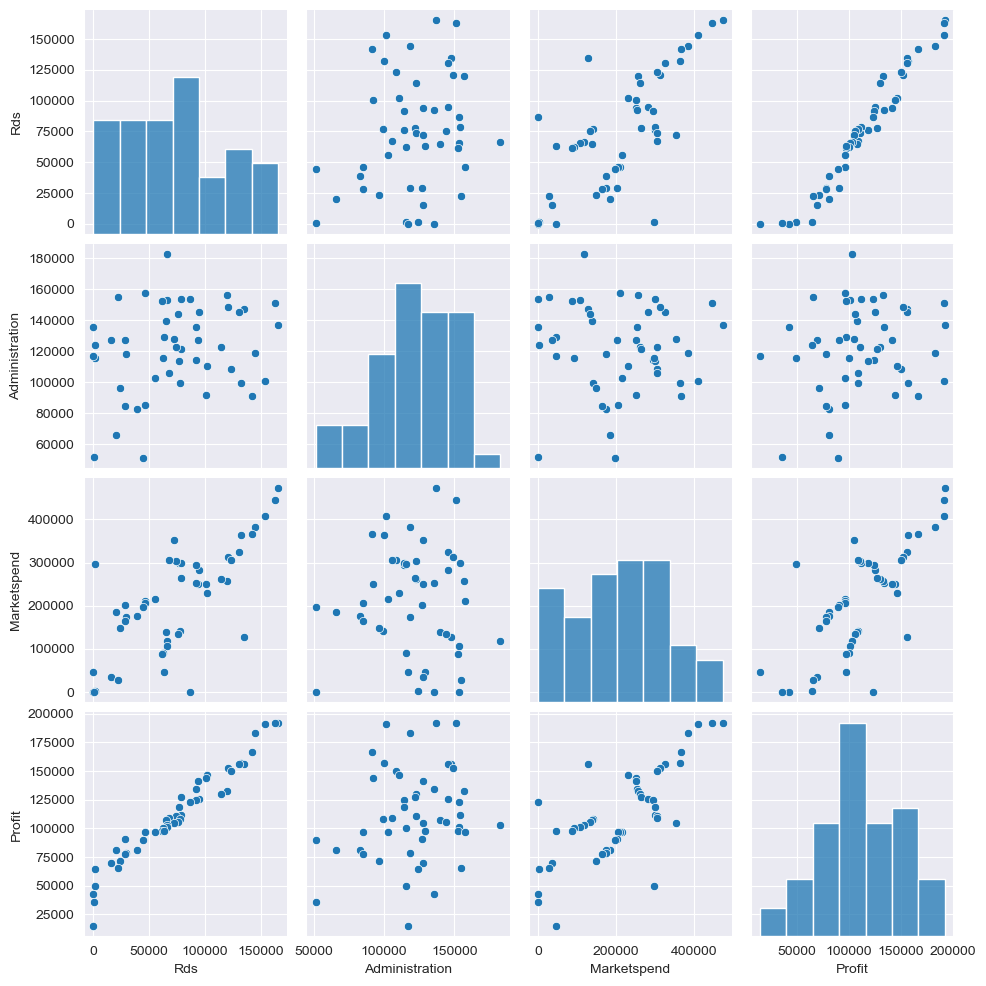

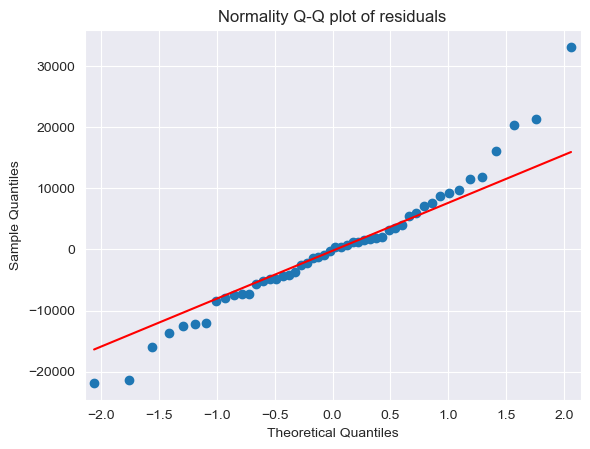

In [110]:
sm.qqplot(model.resid,line='q')
plt.title("Normality Q-Q plot of residuals")
plt.show()

In [111]:
list(np.where(model.resid>10))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 29, 30,
        31, 32, 33, 37, 39, 47, 48, 49], dtype=int64)]

# Residual Plot for Homoscendasticity

In [112]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

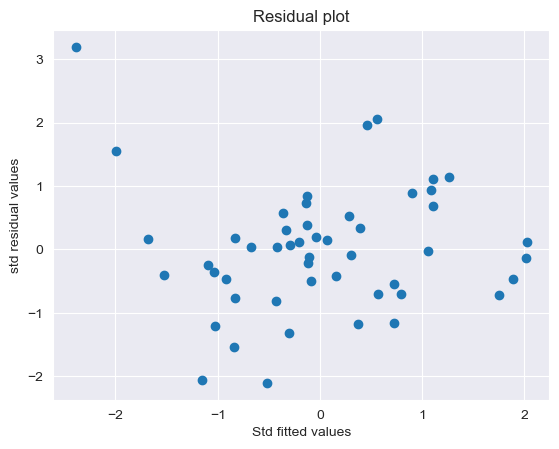

In [113]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Std fitted values')
plt.ylabel('std residual values')
plt.show()

# Residual vs Regression

eval_env: 1


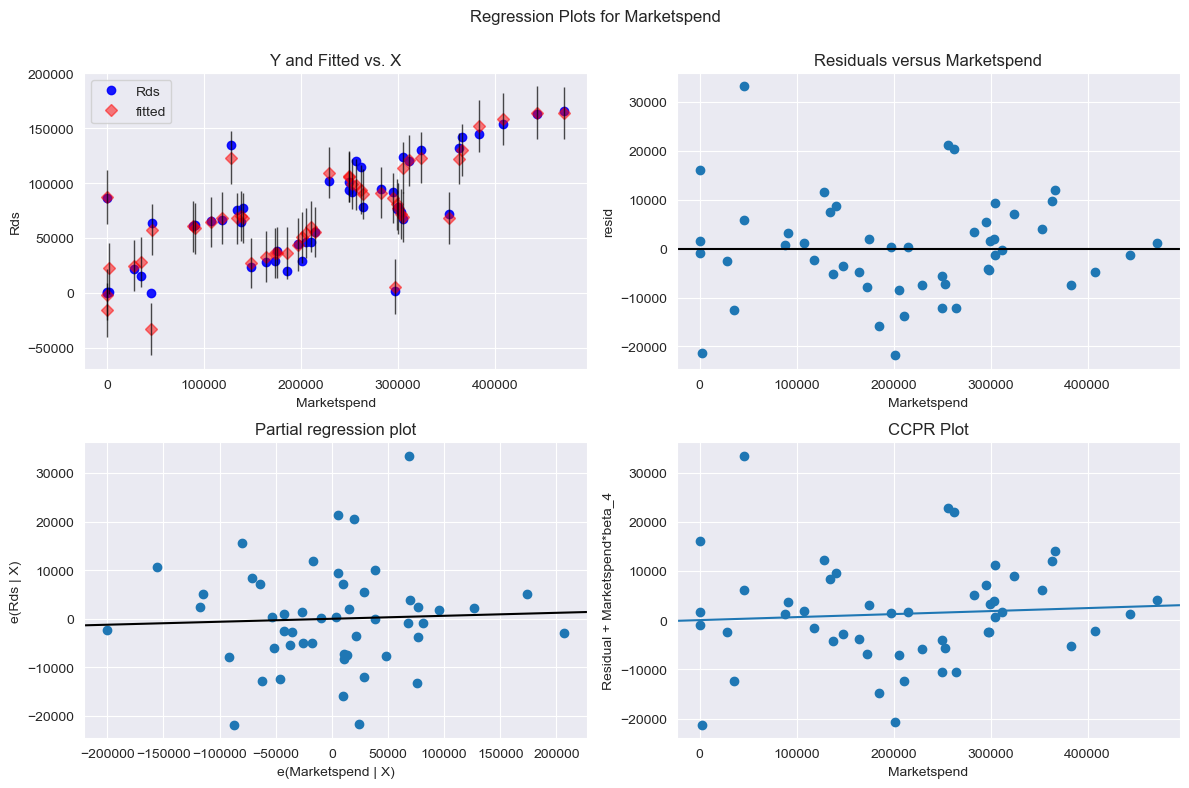

In [117]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model, "Marketspend",fig=fig)
plt.show()

In [ ]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

eval_env: 1


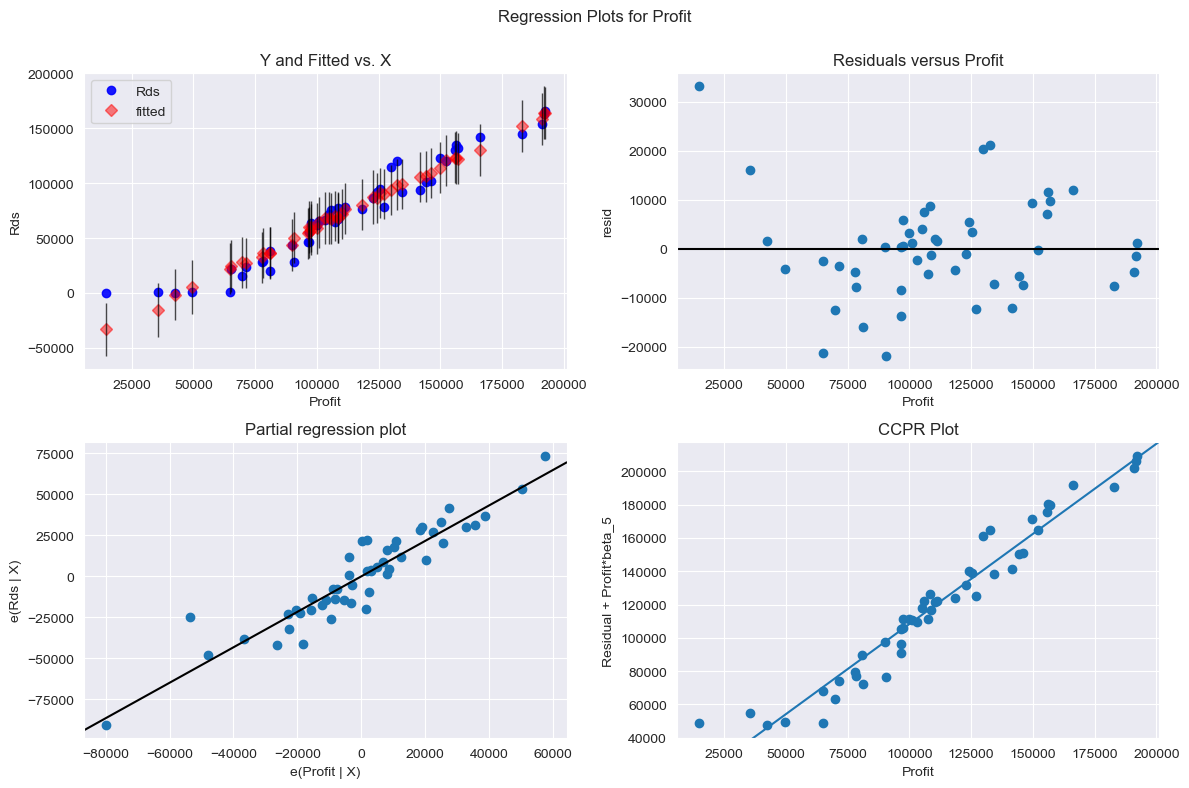

In [119]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model,"Profit",fig=fig)
plt.show()

# Model Deletion Diagnostics 

COOKS DISTANCE


In [120]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

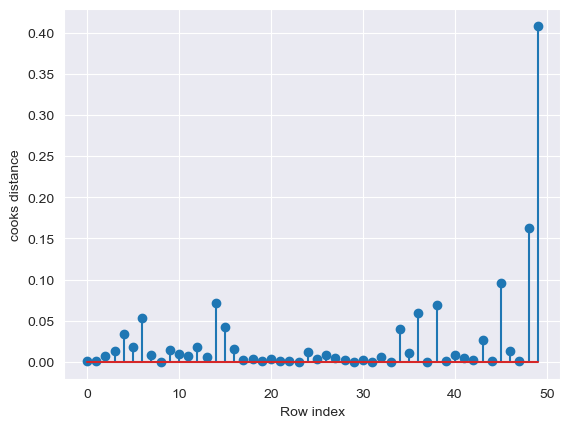

In [121]:
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [122]:
np.argmax(c),np.max(c)

(49, 0.40754813097271186)

# High influence points

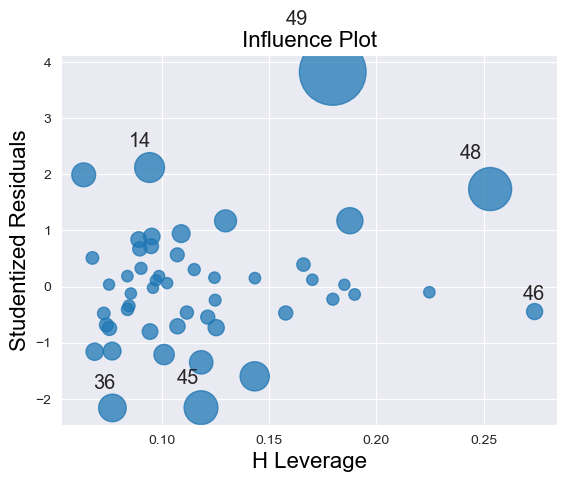

In [130]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [131]:
k=5 
n=startup.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

From above, it is evident that data point 49,48 and 46 are influencers

In [153]:
startup_all[startup_all.index.isin([49,48,46,45])]

,Rds,Administration,Marketspend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model

In [147]:
startup_new=pd.read_csv('50_Startups.csv')

In [154]:
startup_all1=startup.rename(columns={'R&D Spend':'Rds','Marketing Spend':'Marketspend'})
startup_all1.head()

,Rds,Administration,Marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [155]:
startup1=startup_all1.drop(startup_all1.index[[46,48,49,45]],axis=0).reset_index()

In [156]:
startup1=startup1.drop(['index'],axis=1)
startup1

,Rds,Administration,Marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Bulid Model

In [158]:
final_ml_mk=smf.ols('Profit~Administration+Marketspend',data=startup1).fit()
final_ml_mk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     36.63
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           5.16e-10
Time:                        11:24:41   Log-Likelihood:                -523.73
No. Observations:                  46   AIC:                             1053.
Df Residuals:                      43   BIC:                             1059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.865e+04   1.74e+04      1.646      0.107   -6453.180    6.37e+04
Administration     0.2896      0.122      2.378      0.022       0.044       0.535
Marketspend        0.2429      0.029      8.480      0.000       0.185       0.301
==============================================================================
Omnibus:                        1.116   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.816
Skew:                           0.325   Prob(JB):                        0.665
Kurtosis:                       2.951   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
final_ml_rds=smf.ols('Profit~Administration+Rds',data=startup1).fit()
final_ml_rds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     507.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.26e-30
Time:                        11:26:55   Log-Likelihood:                -472.96
No. Observations:                  46   AIC:                             951.9
Df Residuals:                      43   BIC:                             957.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.241e+04   5177.133     12.054      0.000     5.2e+04    7.28e+04
Administration    -0.0872      0.041     -2.147      0.037      -0.169      -0.005
Rds                0.8304      0.026     31.652      0.000       0.777       0.883
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.145
Skew:                           0.021   Prob(JB):                        0.930
Kurtosis:                       2.728   Cond. No.                     7.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
model_influence_mk=final_ml_mk.get_influence()
(c_mk,_)=model_influence_mk.cooks_distance

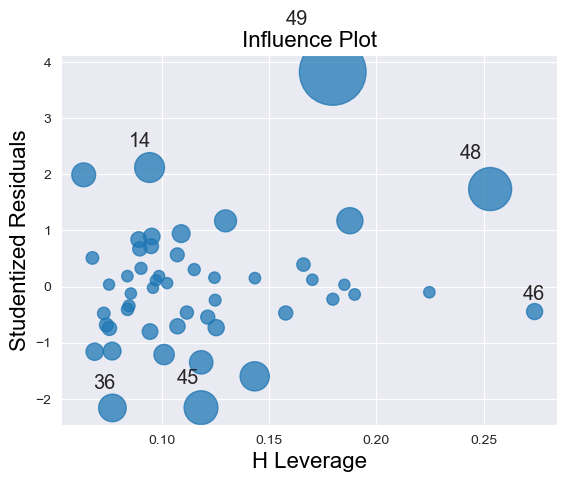

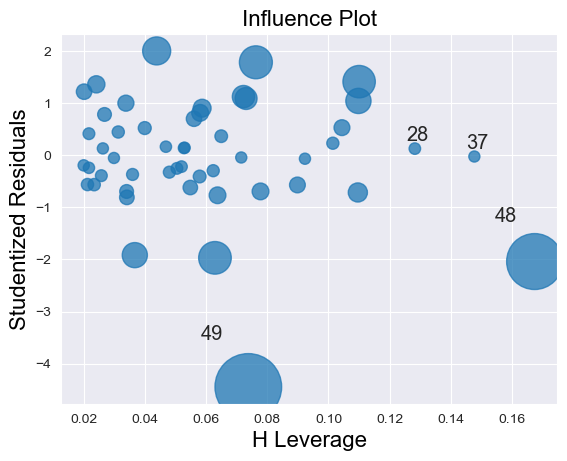

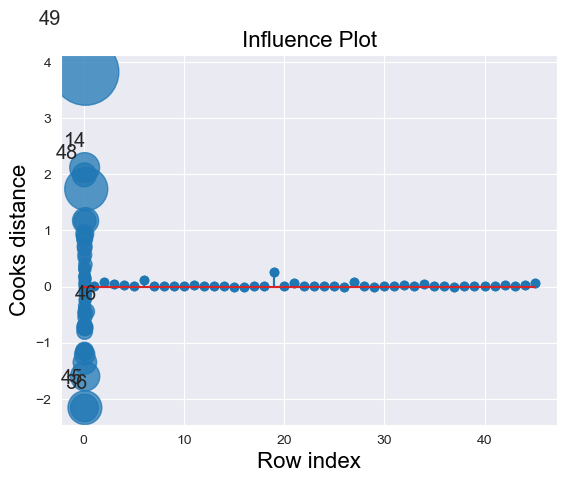

In [163]:
plt.stem(np.round(c_mk,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [164]:
np.argmax(c_mk),np.max(c_mk)

(19, 0.2606926423623144)

In [168]:
startup2=startup1.drop(startup1.index[[45]],axis=0)
startup2

,Rds,Administration,Marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Prediction

In [171]:
new_data=pd.DataFrame({'Rds':70000,'Administration':90000,'MarketingSpend':140000},index=[0])
new_data

,Rds,Administration,MarketingSpend
0,70000,90000,140000


In [175]:
predt_y=final_ml_mk.predict(startup1)
predt_y

0     182896.231201
1     180315.400707
2     157032.331603
3     156099.097630
4     144061.844649
5     145697.675707
6     102297.848837
7     149466.093879
8     147410.515125
9     134204.470286
10    116340.518809
11    115895.443829
12    126207.514180
13    129261.185158
14    136292.468384
15    127745.129155
16    128074.222125
17    139301.813195
18    133351.937593
19     73101.466374
20    134172.320366
21    145989.295623
22    137884.883977
23    133304.798434
24     91544.960718
25    102572.666263
26    102949.355263
27    151469.703863
28    110238.382559
29     98988.122232
30     84271.691434
31     94296.399827
32     77261.167570
33    110629.282294
34    125519.249306
35    103199.015849
36    114297.654400
37     91359.282497
38     92748.229575
39     95187.342636
40    104950.953323
41     93130.324386
42     92453.646912
43     74166.015641
44     80358.745881
45     67863.620743
dtype: float64